# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [2]:
import math
import sys

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [4]:
dataset= pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_white/wine_quality_white.tsv.gz", sep='\t')

In [5]:
print(dataset.sample(10))

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2542            8.9              0.27         0.34            10.7      0.029   
2918            5.7              0.28         0.28             2.2      0.019   
2703            6.5              0.23         0.36            16.3      0.038   
4491            6.1              0.28         0.23             4.2      0.038   
2973            6.6              0.23         0.30            14.9      0.051   
2457            8.1              0.33         0.36             7.4      0.037   
543             6.7              0.24         0.41             8.7      0.036   
3703            7.5              0.24         0.31            13.1      0.050   
1335            5.7              0.21         0.24             2.3      0.047   
4653            6.3              0.36         0.28             2.5      0.035   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2542                 19.5      

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [6]:
# YOUR CODE HERE
print(dataset.columns.tolist())

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'target']


In [7]:
print(dataset.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

In [8]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  target                4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


fixed acidity (float continuous, g(tartaric acid)/dm3): One of the two groups of acidity in wine. Fixed acidity comes primarily from the grapes themselves, and to a lesser extent from fermentation. It is a desirable acidity.

volatile acidity (float continuous, g(acetic acid)/dm3): The other group of acidity in wine. Volatile acidity is associated with spoilage, there are legal limits which this level may not exceed. It is a result of bad grapes and air in the wine allowing bacterial growth. 

citric acid (float continuous, g/dm3): One of the primary fixed acids in wine, it originates in the grapes. Typical levels would be 0 to 500 mg/L. 

residual sugar (float continuous, g/dm3): Sugar from the grapes that is left over after fermentation. This determines how sweet or dry a wine is.

chlorides (float continuous, g(sodium chloride)/dm3): Higher chloride levels are associated with grapes that have more exposure to NaCl primarily due to proximity to the sea or brackish soil.

free sulfur dioxide (float continuous, mg/dm3): This is the sulfur dioxide that helps prevent oxidation and spoilage in the wine. It decreases over time due to binding with other chemicals or aeration. 

total sulfur dioxide (float continuous, mg/dm3): This is the total amount of sulfur dioxide in the wine and is the sum of free sulfur dioxide and bound sulfur dioxide (sulfur dioxide bound to other chemicals). There is a regulated limit for total sulfur dioxide (350 mg/L).

density (float continuous, g/cm3): The density of the wine serves as an indication of how long it has been fermented. Density decreases during fermentation, if the density is too low it likely means the wine was fermented too long and will not taste as good. 

pH (float continuous): pH is the measure of acidity in wine. Wines typically range in acidity from 2.5 to 4.5 pH. This gives wine its tart taste. 

sulphates (float continuous, g(potassium sulphate)/dm3): Sulphates are less commonly discussed in wine, but according to Cortez, they may be related to the fermenting nutrition. 

alcohol (float continuous, vol.%): The amount of alcohol in wine is dependent on the amount of sugar in the grapes. Wines with higher alcohol content will have a fuller body and bolder taste. 

target (int 0-10): This is a subjective quality metric based on the median rating of at least 3 evaluations from wine experts. It ranges from 0 (worst) to 10 (best). 

Sources: <br>
What's in Wine, UC Davis, <br> 
https://waterhouse.ucdavis.edu/whats-in-wine <br>
What is Residual Sugar in Wine?, Wine Folly, <br> 
https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/ <br>
The level of sodium and chloride ions in wine, International Organisation of Vine and Wine, <br>
https://www.oiv.int/standards/compendium-of-international-methods-of-wine-and-must-analysis/annex-d/annex-d-advices/level-of-sodium-and-chlorides-ions-in-wines <br>
Total Sulfur Dioxide – Why it Matters, Too!, Iowa State University, <br>
 https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too/ <br>
Wine Quality White dataset metadata, <br>
 https://github.com/EpistasisLab/pmlb/blob/master/datasets/wine_quality_white/metadata.yaml <br>
Understanding Acidity in Wine, Wine Folly,<br>
 https://winefolly.com/deep-dive/understanding-acidity-in-wine/ <br>
Checking the Specific Gravity and Racking, Winemaker's Academy, <br> 
https://winemakersacademy.com/checking-specific-gravity-racking/ <br>
Modeling wine preferences by data mining from physicochemical properties, Cortez, <br> 
https://www.sciencedirect.com/science/article/pii/S0167923609001377?via%3Dihub <br>
Understanding the Five Basic Characteristics of Wine, Wine Academy, <br>
 https://www.wineinvestment.com/learn/insights/understanding-the-five-basic-characteristics-of-wine/ <br>

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

[6 5 7 8 4 3 9]


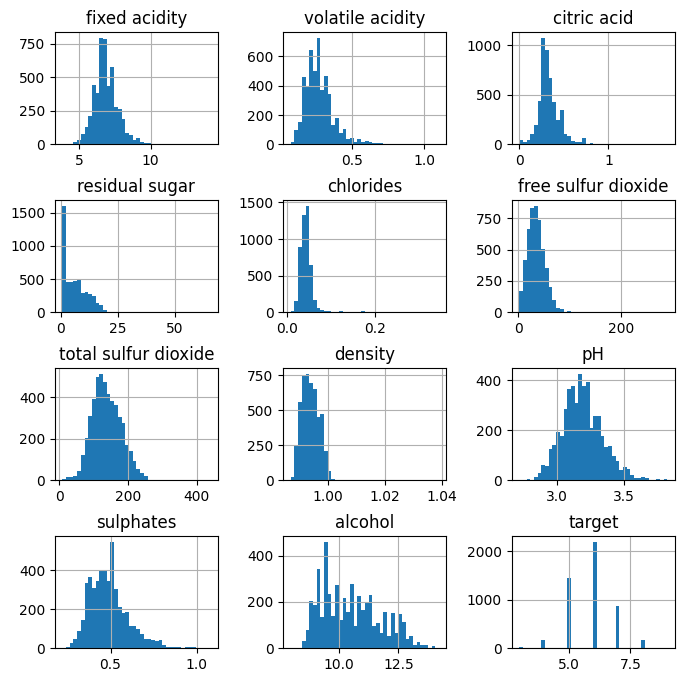

In [9]:
# YOUR CODE HERE

dataset.hist(figsize=(8,8), bins=40)
plt.subplots_adjust(wspace=0.4,hspace=0.5) 
print(dataset['target'].unique())

The following columns have approximately normal distributions: <br>
    -Fixed acidity, citric acid, chlorides, total sulfur dioxide, free sulfur dioxide, density, pH, and target

The following columns have right-skewed distributions: <br>
    -volatile acidity, sulphates, and alcohol

The distribution of residual sugar is the least clear. It could be described as half-normal or exponential, but it does not fit either of these descriptions particularly well. It spikes in the first bin near zero and then has almost stepwise decreasing behavior. It is technically right-skewed as well. 

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

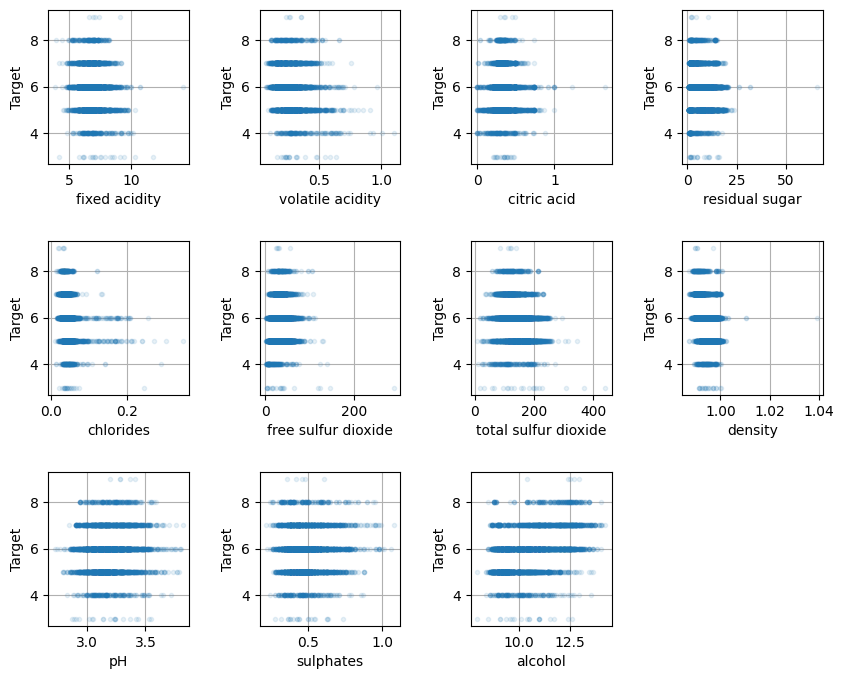

In [10]:
features = dataset.copy().drop('target',axis=1)
target = dataset[['target']]
plt.figure(figsize=(10,8))
for (c,i) in enumerate(features.columns):
    plt.subplot(3,4,c+1)
    plt.plot(dataset[i], target,'.',alpha=0.1)
    plt.xlabel(i)
    plt.ylabel('Target')
    plt.grid()
plt.subplots_adjust(wspace=0.5,hspace=0.5)

Fixed acidity: There appears to be a loose relationship here with the higher scoring wines having a slightly lower median fixed acidity. This may be a result of limited data. Based on the available data, I would not consider it independent.

Volatile acidity: Similar to fixed acidity, it appears higher scoring wines have slightly lower median volatile acidity. Based on the available data, I would not consider it independent.

Citric acid: I consider the target effectively independent of this feature. The median values appear similar across target ranking, knowing x does not give you information about y.

Residual sugar: I consider the target effectively independent of this feature. The median values appear similar across target ranking, knowing x does not give you information about y.

Chloride: I consider the target effectively independent of this feature. The median values appear similar across target ranking, knowing x does not give you information about y.

Free sulfur dioxide: I consider the target effectively independent of this feature. The median values do not have a clear trend across target ranking, knowing x does not give you information about y.

Total sulfur dioxide: It appears higher scoring wines have slightly lower higher total sulfur dioxide. Based on the available data, I would not consider it independent.

Density: There appears to be a loose relationship here with the higher scoring wines having a slightly lower median density. This may be a result of limited data. Based on the available data, I would not consider it independent.

pH: I consider the target effectively independent of this feature. The median values appear similar across target ranking, knowing x does not give you information about y.

Sulphates: I consider the target effectively independent of this feature. The median values do not have a clear trend across target ranking, knowing x does not give you information about y.

Alcohol: The target is not independent of this feature. Higher wine rankings trend toward higher alcohol content. 

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

Mean Squared Error: 0.5631540629886564


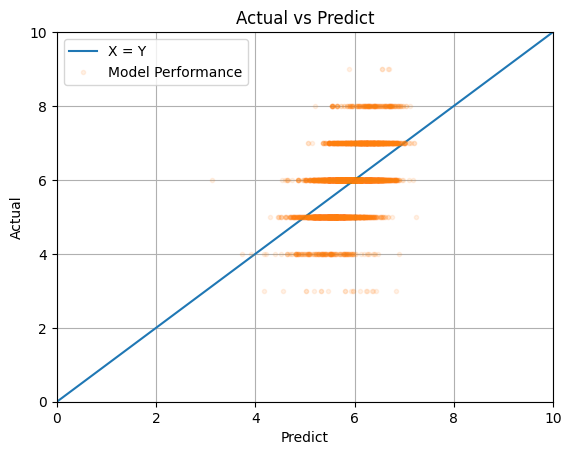

In [11]:
model = sklearn.linear_model.LinearRegression()

model.fit(features,target)
predictOut= model.predict(features)
mse = np.mean((predictOut-target)**2)
print(f'Mean Squared Error: {mse}')
_=plt.plot([0, 10],[0,10])
_=plt.plot(predictOut,target,'.',alpha=0.1)
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.grid()
plt.title('Actual vs Predict')
_=plt.legend(['X = Y', 'Model Performance'])

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
target                  1.000000
Name: target, dtype: float64
Mean Squared Error: 0.6354137863260801


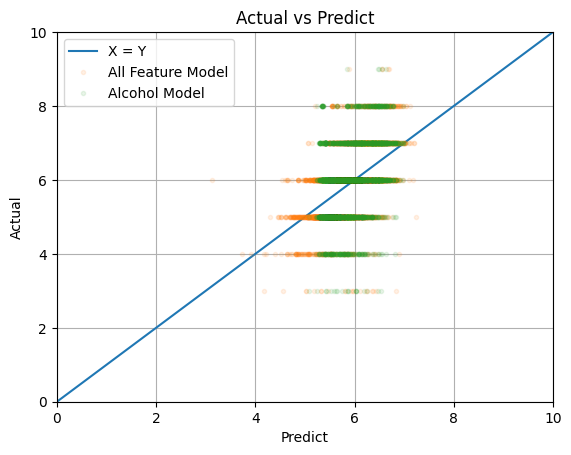

In [12]:
corrmat=dataset.corr()
print(corrmat['target'])
model_singleCol = sklearn.linear_model.LinearRegression()
model_singleCol.fit(features[['alcohol']],target)
predictOut_singleCol= model_singleCol.predict(features[['alcohol']])
mse = np.mean((predictOut_singleCol-target)**2)
print(f'Mean Squared Error: {mse}')
_=plt.plot([0, 10],[0,10])
_=plt.plot(predictOut,target,'.',alpha=0.1)
_=plt.plot(predictOut_singleCol,target,'.',alpha=0.1)
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.grid()
plt.title('Actual vs Predict')
_=plt.legend(['X = Y', 'All Feature Model', 'Alcohol Model'])


Alcohol gives the best linear model on its own. It performs slightly worse, with a higher mean squared error (0.635) than using all the features (0.563).

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

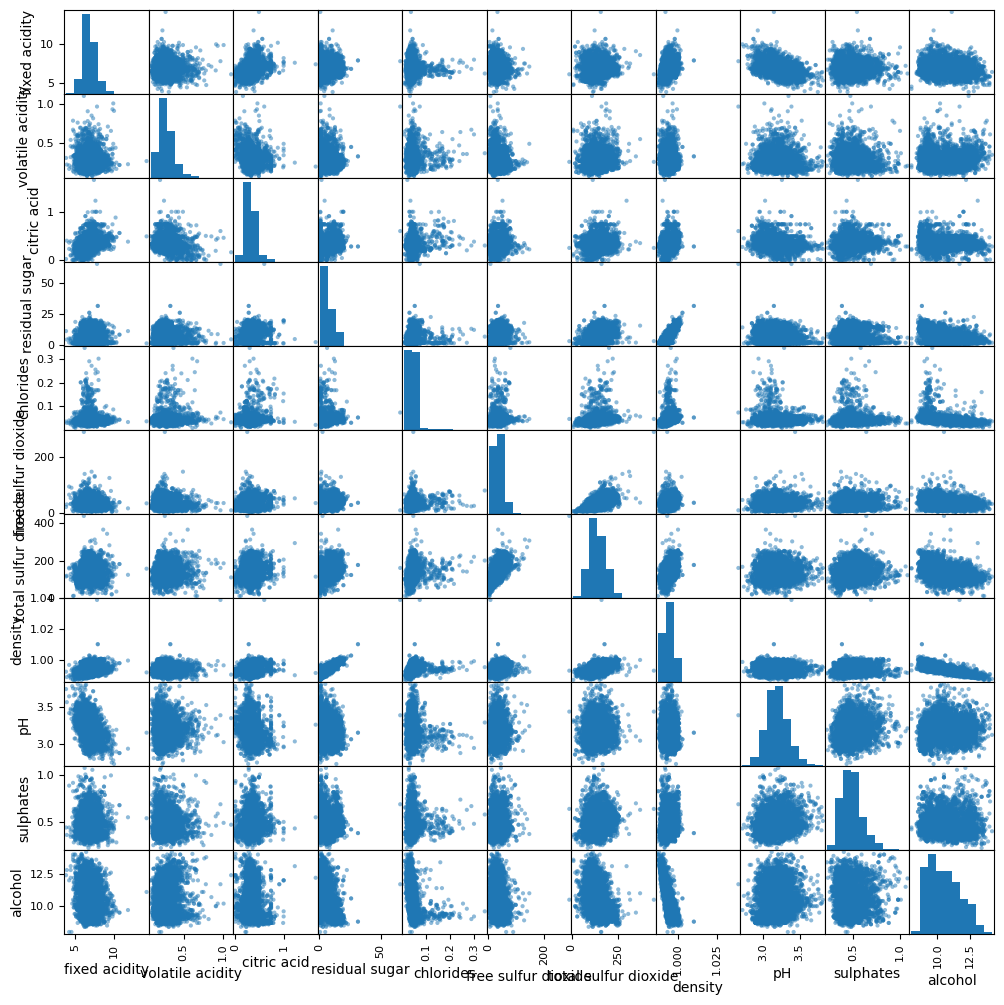

In [13]:
_=pd.plotting.scatter_matrix(features, figsize=(12,12))

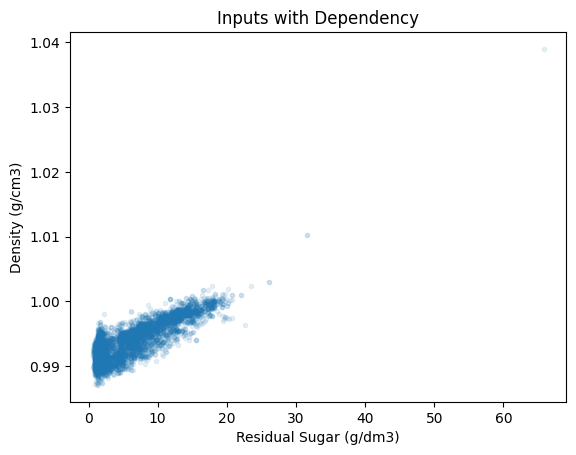

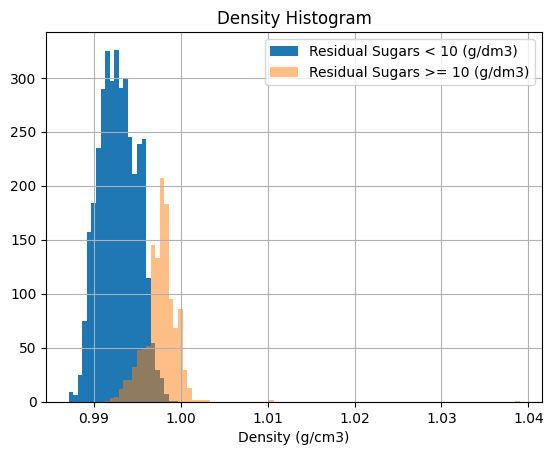

In [14]:
_=plt.plot(features['residual sugar'],features['density'],'.',alpha=0.1)
plt.xlabel('Residual Sugar (g/dm3)')
plt.ylabel('Density (g/cm3)')
plt.title('Inputs with Dependency')

plt.figure()
resSugSplitThresh=10
custbins=np.linspace(features['density'].min(),features['density'].max(),100)
features.query(" `residual sugar` < @resSugSplitThresh")['density'].hist(bins=custbins)
features.query(" `residual sugar` >= @resSugSplitThresh")['density'].hist(bins=custbins,alpha=0.5)
plt.xlabel('Density (g/cm3)')
plt.title('Density Histogram')
_=plt.legend([f'Residual Sugars < {resSugSplitThresh} (g/dm3)',f'Residual Sugars >= {resSugSplitThresh} (g/dm3)'])
# plt.hist(densLowSug)
# plt.hist(densHighSug)

I chose residual sugar and density. The resulting histograms of density with a threshold of 10 g/dm3 residual sugar are satisfying as they make logical sense. Lower density is associated with longer fermentation and longer fermentation results in lower residual sugar. 

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

Data variation explained by first half of principal components: 2123.288 (99.997 %)
Mean Squared Error: 0.6121738755415853


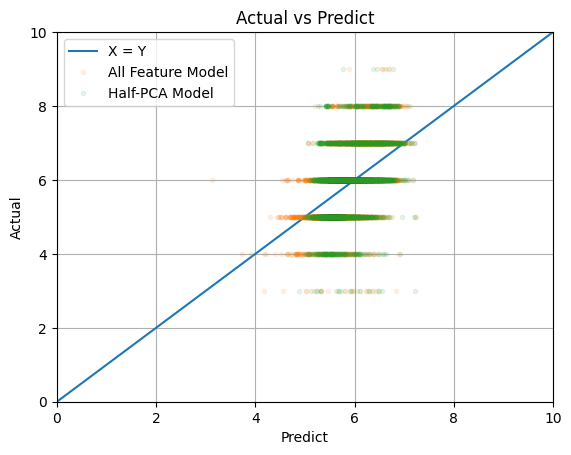

In [15]:
pcaModel=PCA()
pcaModelScaled=PCA()
demeanedFeatures=features-features.mean()
standardScalerFeatures=demeanedFeatures/features.std()
pcaModel.fit(features)
pcaModelScaled.fit(standardScalerFeatures)
explainedVar=pcaModel.explained_variance_
explainedVarRat=pcaModel.explained_variance_ratio_
halfLen=len(explainedVar)//2
firstHalfExpVar=sum(explainedVar[:halfLen])
firstHalfExpVarRat=sum(explainedVarRat[:halfLen])*100
print(f'Data variation explained by first half of principal components: {firstHalfExpVar:.3f} ({firstHalfExpVarRat:.3f} %)')

pcaFirstHalfComp=pcaModel.components_[:halfLen]
pcaScaledFirstHalfComp=pcaModelScaled.components_[:halfLen]
coords= demeanedFeatures @ pcaFirstHalfComp.T
# coords= standardScalerFeatures @ pcaFirstHalfComp.T

modelLinReg = sklearn.linear_model.LinearRegression()
modelLinReg.fit(coords,target)
predictOutCoords= modelLinReg.predict(coords)
mseCoords = np.mean((predictOutCoords-target)**2)
print(f'Mean Squared Error: {mseCoords}')

_=plt.plot([0, 10],[0,10])
_=plt.plot(predictOut,target,'.',alpha=0.1)
_=plt.plot(predictOutCoords,target,'.',alpha=0.1)
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.grid()
plt.title('Actual vs Predict')
_=plt.legend(['X = Y', 'All Feature Model', 'Half-PCA Model'])

The model with the first half of PCA components performs slightly worse than the original linear regression model with all features (as expected). The five component PCA model has a higher mean squared error of 0.612 vs the original model at 0.563. However, it does perform better than the single column model which had a mean squared error of 0.635. Note that with standardized features the five component PCA model has worse error at 0.645 (and the five PCA components only explain ~72% of the variation vs ~100% unscaled).

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

residual sugar
density
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.089021   0.023086            -0.04

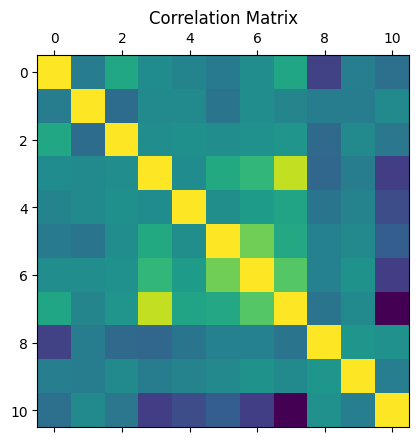

In [16]:
_=plt.matshow(features.corr())
_=plt.title('Correlation Matrix')
print(features.columns[3])
print(features.columns[7])
print(features.corr())
# _=plt.matshow(standardScalerFeatures.corr())
# _=plt.title('Correlation Matrix -- Scaled Features')

PCA unscaled: [[ 1.54440234e-03  1.69003682e-04  3.38650580e-04  4.73275284e-02
   9.75740505e-05  2.61877002e-01  9.63857636e-01  3.59698303e-05
   3.38465456e-06  3.40902808e-04 -1.25037482e-02]
 [-9.16349763e-03 -1.54546977e-03  1.40306911e-04  1.49431815e-02
  -7.18299806e-05  9.64685369e-01 -2.62736857e-01 -1.83631853e-05
  -4.16985633e-05 -3.61111182e-04  6.45519597e-03]
 [ 1.29002621e-02  9.28887403e-04  1.25844404e-03  9.95191728e-01
   7.84988105e-05 -2.63931831e-02 -4.27888053e-02  4.46897943e-04
  -7.01734244e-03 -2.14205322e-03 -8.27226781e-02]
 [-1.47657857e-01  1.54517098e-02 -5.00452863e-03  8.42004842e-02
  -6.57323159e-03 -6.38110898e-03  1.06135065e-02 -1.15165705e-03
   1.70271362e-02  2.60091346e-03  9.85062967e-01]
 [ 9.84964681e-01 -3.97807571e-03  4.16921666e-02 -8.08023119e-04
  -1.49778517e-03  7.87469051e-03 -1.75276556e-03  3.28441957e-04
  -7.55059384e-02 -3.53826203e-03  1.49361179e-01]]
PCA scaled: [[ 0.15721845  0.00508949  0.14404984  0.42740837  0.21201

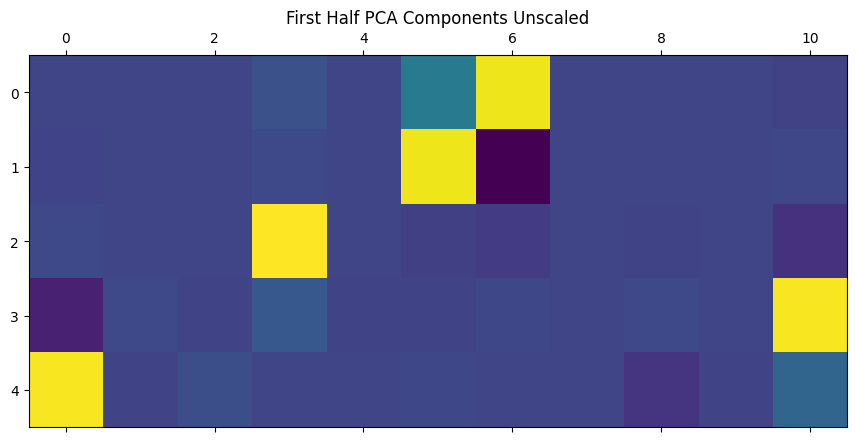

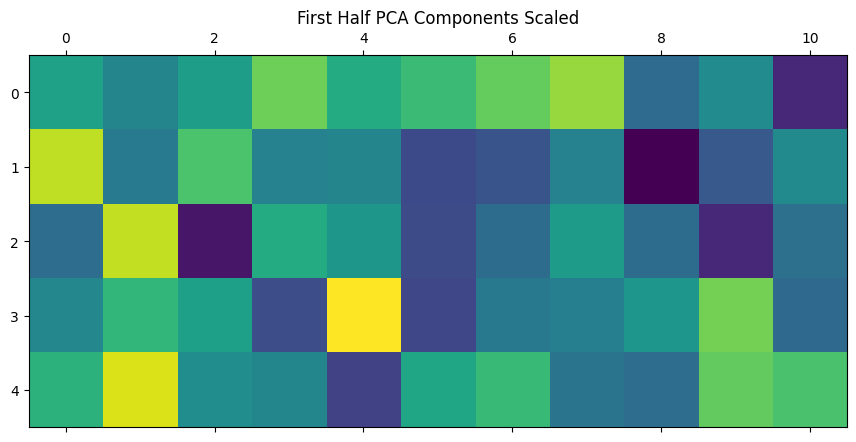

In [17]:

print(f'PCA unscaled: {pcaFirstHalfComp}')
_=plt.matshow(pcaFirstHalfComp)
_=plt.title('First Half PCA Components Unscaled')
print(f'PCA scaled: {pcaScaledFirstHalfComp}')
_=plt.matshow(pcaScaledFirstHalfComp)
_=plt.title('First Half PCA Components Scaled')

Residual Sugar (column 3) and Density (column 7) have the highest correlation at 0.84. Originally I ran this analysis without scaling the features, in that case there is no indication of the highest correlated inputs in PCA because while they are highly correlated they do not describe as much variation in the model as other features with larger magnitudes. However, after scaling the features their high correlation is highlighted in them being the highest weighted features in the first principle component as they now describe the most variation. 

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

4745


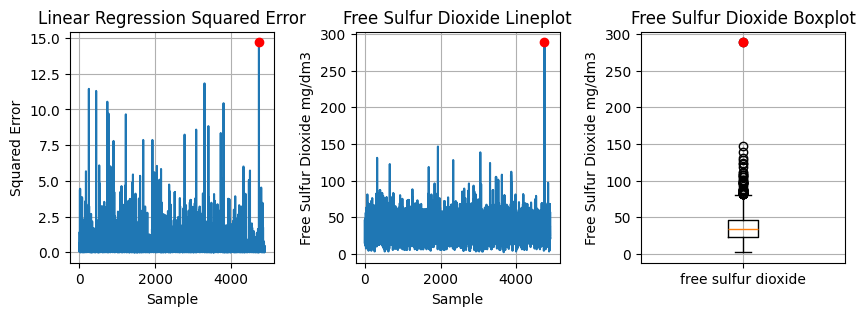

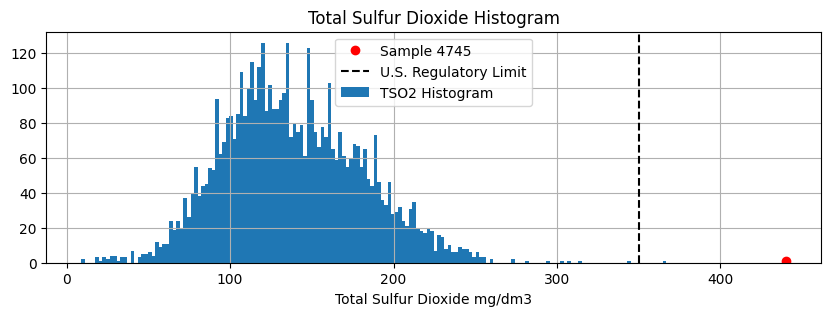

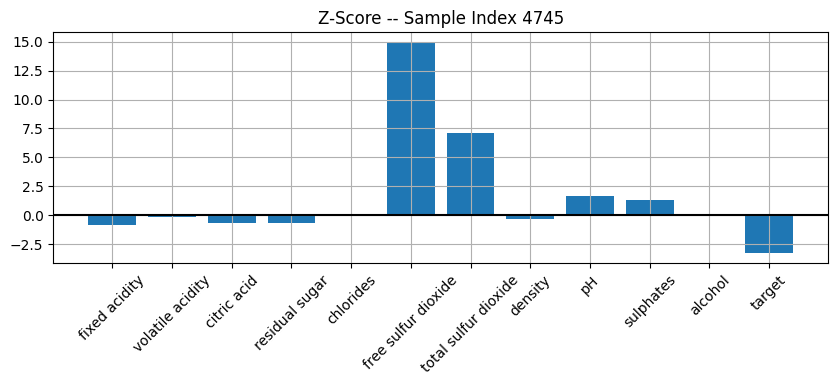

In [20]:

squaredError=(predictOut-target)**2
squaredErrorInd=np.argmax(squaredError)
print(squaredErrorInd)
# print(target.value_counts())
# print(len(target))
# print(target.value_counts()/len(target))
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.plot(squaredError)
plt.plot(squaredErrorInd,squaredError.iloc[squaredErrorInd],'ro')
plt.title('Linear Regression Squared Error')
plt.xlabel('Sample')
plt.ylabel('Squared Error')
plt.grid()
plt.subplot(1,3,2)
plt.plot(features['free sulfur dioxide'])
plt.plot(squaredErrorInd,features['free sulfur dioxide'].iloc[squaredErrorInd],'ro')
plt.xlabel('Sample')
plt.ylabel('Free Sulfur Dioxide mg/dm3')
plt.title('Free Sulfur Dioxide Lineplot')
plt.grid()
plt.subplot(1,3,3)
plt.boxplot(features['free sulfur dioxide'])
plt.ylabel('Free Sulfur Dioxide mg/dm3')
plt.plot(1,features['free sulfur dioxide'].iloc[squaredErrorInd],'ro')
plt.xticks([1],['free sulfur dioxide'])
plt.title('Free Sulfur Dioxide Boxplot')
plt.subplots_adjust(wspace=0.4)
plt.grid()

plt.figure(figsize=(10,3))
plt.grid()
features['total sulfur dioxide'].hist(bins=200)
plt.plot(features['total sulfur dioxide'].iloc[squaredErrorInd],1,'ro')
plt.axvline(350,color='k',linestyle='--')
plt.legend([f'Sample {squaredErrorInd}','U.S. Regulatory Limit','TSO2 Histogram'])
plt.title('Total Sulfur Dioxide Histogram')
plt.xlabel('Total Sulfur Dioxide mg/dm3')

# print(dataset.iloc[squaredErrorInd,:])
stdCount=(dataset.iloc[squaredErrorInd,:]-dataset.mean())/dataset.std()
# print(stdCount)
plt.figure(figsize=(10,3))
plt.grid()
plt.bar(np.arange(len(stdCount.T)),stdCount.to_numpy().T.ravel())
plt.axhline(0,color='k')
plt.xticks(np.arange(len(stdCount.T)),dataset.columns,rotation=45)
_=plt.title('Z-Score -- Sample Index 4745')
# print(dataset.describe())
# print(predictOut[squaredErrorInd])

In order to identify an outlier row I considered the squared error between the linear regression model and the target values. I identified sample index 4745 as having the largest squared error. I then looked at its feature values compared to the summary statistics for the dataset at large and calculated its z-scores. Sample 4745 has almost 15 standard deviations higher free sulfur dioxide levels! Unsurprisingly its total sulfur dioxide level is also quite high ~7.5 std deviations above the mean. In fact its total sulfur dioxide level exceeds US regulatory limits (440 ppm vs 350 ppm). Its pH and sulphate levels are also elevated, but not to the extremities of its sulfur dioxide content. It received the lowest quality score assigned to wines in the dataset, a 3 out of 10. Only 0.4% of wines received this score (20 out of 4898).

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

NONE